# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

    В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

    По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Цель проекта

* Изучить представленне данные из объявлений по продаже квартир;
* Изучить основные параметры (общая площадь, число комнат, расстояние до центра и т.д.);
* Изучить факторы, влияющие на стоимость квартир;
* Выделить 10 населенных пунктов по числу объявлений и определить цену за квадратный метр для каждого;
* Узнать, как стоимость объекта зависит от расстояния до центра города.

## Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/dima/Downloads/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
pd.set_option('display.max_columns', None)
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


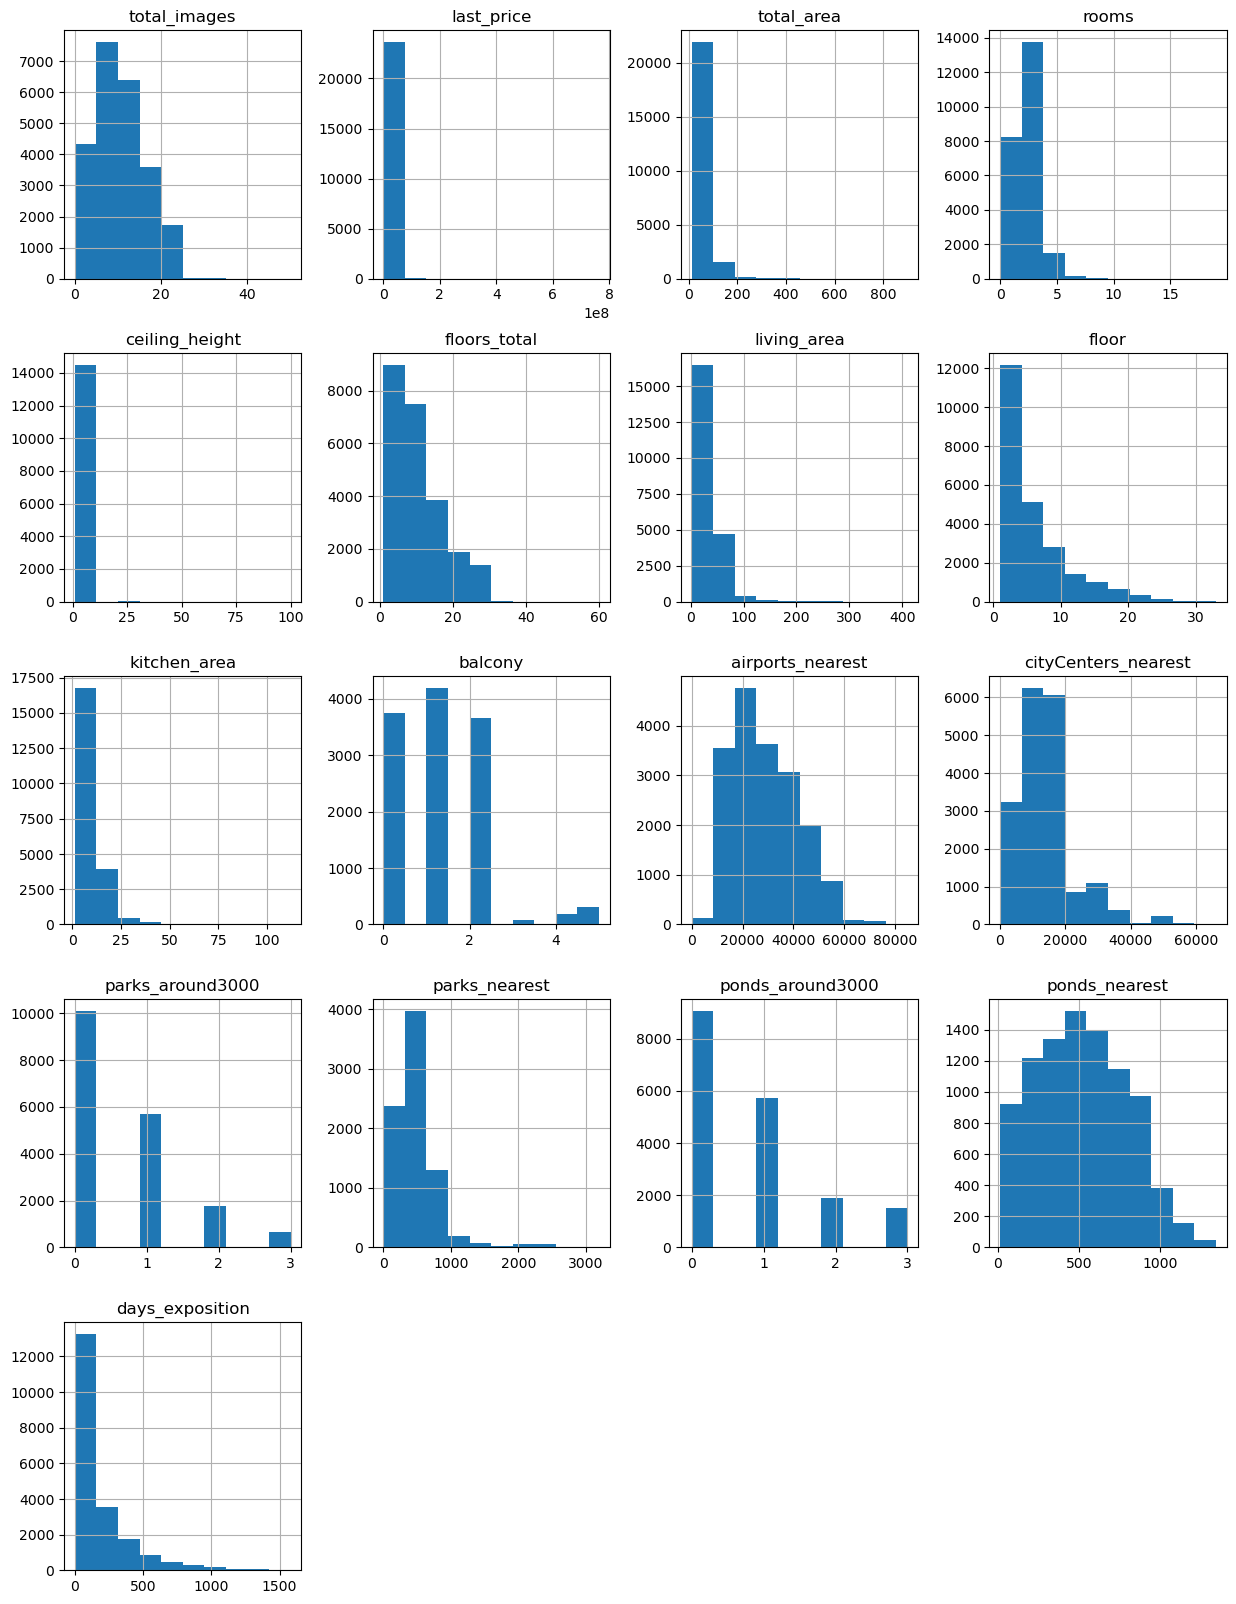

In [4]:
data.hist(figsize=(15, 20));

Исходные данные содержат 22 столбца и 23699 строк. Судя по первому выводу строк, есть пропущенные значения, которые нужно заменить, какие возможно. Есть выбивающиеся значения, в столбце rooms есть значения 0, что впринципе невозможно. В столбце с высотой потолков очень много пропущенных значений, которые можно заменить. Общая этажность и апартаменты можно сменить тип данных. Жилая площадь и площадь кухни можно поменять на медианное значение. Количество балконов поменяем на 0. Данные с расстоянием до парков, аэропорта, центра и водоемов мы поменять не сможем, так как не получится прийти к более-менее достоверному результату.


## Предобработка данных

#### Переименование столбцов

In [5]:
#переименуем при помощи rename()
data = data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})
list(data)

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around_3000',
 'parks_nearest',
 'ponds_around_3000',
 'ponds_nearest',
 'days_exposition']

#### Замена пропущенных значений

In [6]:
#определим пропущенные значения в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
#можно заполнить пропуски в столбце living_area медианным значением, при это коэффициент корреляции сильно не изменился с 0,93 до 0,87, тоесть данные координально не поменятся и не будут влиять на ход исследования
#медианное значение получилось 30
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
display(data['living_area'].head(10)) 
display(data['living_area'].isna().sum())

0    51.00
1    18.60
2    34.30
3    30.00
4    32.00
5    14.40
6    10.60
7    30.00
8    15.43
9    43.60
Name: living_area, dtype: float64

0

In [8]:
#в столбце ceiling_height есть аномальные значения высоты потолков более 10 метров, это явная ошибка, можно их преобразовать, поделив на 10
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height']/10
#столбец с высотой потолков можно так же заполнить медианным значение, т.к. стандартная высота потолков считается около 2,5-3 метров, наша медианна получилась 2,65
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
display(data['ceiling_height'].head(10)) 
data['ceiling_height'].isna().sum()

0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
5    2.65
6    2.65
7    2.65
8    2.65
9    2.50
Name: ceiling_height, dtype: float64

0

In [9]:
#заменим пропущенные значения в стобце с количеством балконов на 0
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

In [10]:
#заменили значения в столбце апартаменты на значение False, т.к. скорее всего если не указано значение, то это не апартаменты, в итоге у нас изменится тип данных на булев массив
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

In [11]:
#можно заполнить пропуски в столбце kitchen_area медианным значением, при это коэффициент корреляции сильно не изменился с 0,60 до 0,56, что сильно не отразится на дальнейших результатах
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
display(data['kitchen_area'].head(10))
data['kitchen_area'].isna().sum()

0    25.00
1    11.00
2     8.30
3     9.10
4    41.00
5     9.10
6    14.40
7    18.90
8     8.81
9     6.50
Name: kitchen_area, dtype: float64

0

#### Изменение типов данных

In [12]:
#в столбце 'first_day_exposition' изменили тип данных с object на datatime, для того чтобы мы смогли выполнять вычисления с этим столбцом
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#в столбцах last_price и balcony находятся целые значения, поэтому можно поменять их тип на int
data['balcony'] = data['balcony'].astype(int)
data['last_price'] = data['last_price'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

#### Поиск дубликатов

In [13]:
#строк-дубликатов в данных нет
data.duplicated().sum()

0

In [14]:
#уберем неявные дубликаты с одним названием, но написаны по-разному, например, поселок и посёлок
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

#устраняем неявные дубликаты в названиях населённых пунктов, путем перебора уникальных значений столбца locality_name
display(data['locality_name'].value_counts())
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].replace('садовое товарищество Рахья', 'поселок городского типа Рахья')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Мга', 'городской поселок Мга')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Большая Ижора', 'городской поселок Большая Ижора')
data['locality_name'] = data['locality_name'].replace('село Никольское', 'Никольское')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Вещево', 'поселок станции Вещево')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')
data['locality_name'] = data['locality_name'].replace('село Никольское', 'Никольское')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Советский', 'городской поселок Советский')
data['locality_name'] = data['locality_name'].replace('поселок Громово', 'поселок станции Громово')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].replace('деревня Щеглово', 'поселок Щеглово')
data['locality_name'] = data['locality_name'].replace('поселок Любань', 'Любань')
data['locality_name'] = data['locality_name'].replace('городской поселок Лесогорский', 'поселок городского типа Лесогорский')
data['locality_name'] = data['locality_name'].replace('городской поселок Назия', 'поселок городского типа Назия')
data['locality_name'] = data['locality_name'].replace('городской поселок Павлово', 'поселок городского типа Павлово')
data['locality_name'] = data['locality_name'].replace('село Павлово', 'поселок городского типа Павлово')
data['locality_name'] = data['locality_name'].replace('поселок Гарболово', 'деревня Гарболово')
data['locality_name'] = data['locality_name'].replace('деревня Зимитицы', 'поселок Зимитицы')
data['locality_name'] = data['locality_name'].replace('поселок Калитино', 'деревня Калитино')
data['locality_name'] = data['locality_name'].replace('поселок Рабитицы', 'деревня Рабитицы')
data['locality_name'] = data['locality_name'].replace('деревня Федоровское', 'городской поселок Федоровское')
data['locality_name'] = data['locality_name'].replace('коттеджный поселок Лесное', 'поселок Лесное')
data['locality_name'] = data['locality_name'].replace('поселок Рябово', 'поселок городского типа Рябово')
data['locality_name'] = data['locality_name'].replace('поселок Саперный', 'поселок Саперное')
data['locality_name'] = data['locality_name'].replace('садовое товарищество Приладожский', 'поселок городского типа Приладожский')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Рощино', 'городской поселок Рощино')

locality_name
Санкт-Петербург                     15721
поселок Мурино                        556
поселок Шушары                        440
Всеволожск                            398
Пушкин                                369
                                    ...  
поселок Левашово                        1
садовое товарищество Новая Ропша        1
деревня Шпаньково                       1
деревня Курковицы                       1
поселок Дзержинского                    1
Name: count, Length: 330, dtype: int64

#### Удаление аномальных значений 

In [15]:
#удалили значения в столбце с общей этажностью дома со значениями выше 37, т.к. самое высокое жилое здание Санкт-Петербурга и области не привышает 37 этажей
data = data[(data.floors_total < 37)]
display(data.query('floors_total>37'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [16]:
#исключим из датафрейма значения в столбце с высотой потолков ниже 2 метров
data = data[(data.ceiling_height > 2)]
display(data.query('ceiling_height < 2'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [17]:
#исключим из датафрейма значения в столбце с количеством комнат равные 0
data = data[(data['rooms'] != 0)]
display(data.query('rooms == 0'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [18]:
#исключим из датафрейма значения в столбце с ценой недвижимости равной 12190, явная ошибка
display(data.query('last_price < 400000'))
data = data[(data['last_price'] != 12190)]
display(data.query('last_price < 400000'))



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [19]:
display(data.query('living_area > 150'))
#в таком случае, думаю редким значением можно считать жилую площадь больше 150 кв.м., при этом мы удалим 119 строк, это небольшая доля от общего количества
data = data[data['living_area'] < 150]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
155,8,96000000,317.0,2017-07-07,4,3.50,3.0,183.0,3,False,False,False,9.1,1,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0
464,15,66571000,280.3,2015-06-11,6,5.20,8.0,159.5,7,False,False,False,21.1,0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
660,3,49950000,483.9,2017-10-04,7,3.20,6.0,312.5,4,False,False,False,26.4,0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
681,20,24900000,249.0,2015-08-13,7,2.65,5.0,180.0,4,False,False,False,9.1,1,Санкт-Петербург,24810.0,6108.0,0.0,NaN,0.0,NaN,781.0
793,20,135000000,310.0,2018-05-22,4,3.30,5.0,250.0,2,False,False,False,50.0,0,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22904,4,19500000,190.0,2017-04-27,6,2.65,4.0,159.6,3,False,False,False,21.0,0,Санкт-Петербург,20965.0,814.0,0.0,NaN,2.0,267.0,87.0
22907,9,65000000,228.0,2016-06-02,4,2.65,5.0,200.0,2,False,False,False,9.1,0,Санкт-Петербург,22783.0,1295.0,3.0,619.0,3.0,269.0,NaN
22965,19,35000000,236.0,2019-03-26,6,4.00,5.0,164.3,2,False,False,False,16.4,1,Санкт-Петербург,31670.0,8748.0,1.0,243.0,1.0,827.0,18.0
23005,20,30750000,297.5,2018-09-09,6,3.14,4.0,181.8,2,False,False,False,21.9,0,Санкт-Петербург,20630.0,1229.0,3.0,189.0,3.0,40.0,42.0


In [20]:
display(data.query('living_area > 150'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [21]:
#думаю можно считать редкими квартиры стоимостью более 80 млн. рублей, эти значения довольно редкие и их не особо много
display(data.query('last_price > 80000000'))
data = data[data['last_price'] < 80000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
492,18,95000000,216.0,2017-12-05,4,3.00,5.0,86.00,4,False,False,False,77.00,0,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0
509,5,90000000,225.0,2016-06-26,6,2.65,4.0,134.00,2,False,False,False,19.50,2,Санкт-Петербург,32864.0,5720.0,0.0,NaN,2.0,519.0,416.0
1436,19,330000000,190.0,2018-04-04,3,3.50,7.0,95.00,5,False,False,False,40.00,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
2243,9,130278280,304.0,2015-07-24,5,3.11,9.0,30.00,7,False,False,False,9.10,0,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,599.0
2536,16,159984000,242.4,2015-08-27,4,3.85,9.0,131.00,7,False,False,False,20.00,0,Санкт-Петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,501.0
3117,19,140000000,631.0,2019-03-30,7,2.65,5.0,30.00,5,False,False,False,60.00,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
4996,20,124000000,124.5,2017-10-12,4,3.00,4.0,67.20,2,False,False,False,20.00,0,Санкт-Петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0
5893,3,230000000,500.0,2017-05-31,6,2.65,7.0,30.00,7,False,False,False,40.00,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
6183,10,84382000,363.1,2018-10-07,3,2.65,16.0,30.00,12,False,False,False,31.73,0,Санкт-Петербург,31887.0,4979.0,0.0,NaN,2.0,182.0,NaN
6460,20,82000000,235.0,2017-07-10,7,3.33,7.0,147.20,5,False,False,False,28.40,0,Санкт-Петербург,22992.0,1280.0,3.0,395.0,3.0,170.0,197.0


In [22]:
display(data.query('last_price > 80000000'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [23]:
display(data.query('total_area > 250'))
data = data[data['total_area'] < 250]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
581,20,65000000,365.00,2019-03-18,7,2.90,7.0,30.00,7,False,False,False,9.10,0,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN
1388,20,59800000,399.00,2015-01-21,5,5.60,6.0,30.00,6,False,False,False,9.10,0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3676,12,28789000,441.98,2019-01-23,4,2.65,6.0,30.00,6,False,False,False,35.05,0,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN
4149,6,23000000,272.60,2018-01-11,10,3.14,7.0,145.90,7,False,False,False,18.80,1,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN
4536,25,26000000,290.00,2017-11-16,5,2.80,17.0,141.00,16,False,False,False,45.00,0,Санкт-Петербург,30094.0,5608.0,0.0,NaN,1.0,153.0,120.0
5873,0,38000000,400.00,2019-03-15,7,3.60,3.0,30.00,1,False,False,False,9.10,0,Санкт-Петербург,24889.0,5457.0,1.0,271.0,0.0,NaN,NaN
7274,16,43000000,280.00,2014-12-10,5,4.40,5.0,30.00,4,False,False,False,9.10,0,Санкт-Петербург,26711.0,5559.0,0.0,NaN,1.0,785.0,1065.0
7558,18,72000000,251.00,2016-02-19,3,2.75,4.0,30.00,3,False,False,False,9.10,0,Санкт-Петербург,24377.0,4471.0,3.0,570.0,0.0,NaN,500.0
9397,10,16073000,263.80,2019-01-30,3,2.65,19.0,30.00,4,False,False,False,23.42,0,Санкт-Петербург,18805.0,4400.0,0.0,NaN,0.0,NaN,35.0
9433,20,46000000,260.00,2015-01-22,3,2.80,18.0,74.00,18,False,False,False,18.80,0,Санкт-Петербург,30766.0,8059.0,0.0,NaN,1.0,213.0,NaN


In [24]:
display(data.query('total_area > 250'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23215 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23215 non-null  int64         
 1   last_price            23215 non-null  int32         
 2   total_area            23215 non-null  float64       
 3   first_day_exposition  23215 non-null  datetime64[ns]
 4   rooms                 23215 non-null  int64         
 5   ceiling_height        23215 non-null  float64       
 6   floors_total          23215 non-null  float64       
 7   living_area           23215 non-null  float64       
 8   floor                 23215 non-null  int64         
 9   is_apartment          23215 non-null  bool          
 10  studio                23215 non-null  bool          
 11  open_plan             23215 non-null  bool          
 12  kitchen_area          23215 non-null  float64       
 13  balcony              

    Заменили пропущенные значения в тех столбцах, где это возможно и изменения не отразятся на последующих вычислениях. В остальных столбцах, которых оставили пропущенные значения, логическую замену представить невозможно. Например, в столбцах  airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition невозможно заменить на среднее, медиану, константу или внутригрупповое значение. Это все равно не отразит близкое к истинному значению.
    Изменили тип данных в столбцах first_day_exposition, balcony, last_price, is_apartment. В столбце floor_total не поменяли значения на int т.к. у нас имеются пропуски. В остальных столбцах airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition - тип данных остался float, по причине, наличия пропущенных значений.
    В процессе предобработки данных выявили неявные дубликаты в столбце с наименование населенного пункта. В их числе были дубликаты в которых название населенных пунктов одинаковое, но разница лишь в написании букв 'е' и 'ё'. Помимо этого, были еще одинаковые названия населенных пунктов, но разные типы населенных пунктов. Данные были исправлены и преобразованы к единому названию, где это необходимо.
    Удалил аномальные значения в столбцах floors_total, ceiling_height, last_price, rooms. В этих столбцах находились данные которые выбивались из общих значений столбцов. Количество аномальных значений было немного относительно количества всех записей, поэтому это никак не повлияет на ход дальнейшего исследовательского анализа данных. 

## Посчитайте и добавьте в таблицу новые столбцы

In [26]:
#посчитаем цену за квадратный метр и добавим ее в новый столбец
data['price_per_square_meter'] = round((data['last_price']/data['total_area']),2)

#создадим столбец с днем недели публикации при помощи dt.weekday, до этого мы уже преобразовали дату к нужному формату
data['day_week_pub'] = data['first_day_exposition'].dt.weekday

#создадим столбец с месяцем публикации при помощи dt.month
data['month_of_pub'] = data['first_day_exposition'].dt.month

#создадим столбец с годом публикации при помощи dt.year
data['year_of_pub'] = data['first_day_exposition'].dt.year

#с помощью функции определим тип этажа и добавим в новый столбец
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
# создадим новый столбец для функции    
data['floor_type'] = data.apply(floor_category, axis=1)

#переведем расстояние до центра из метров в километры и добавим расчеты в новый столбец откругив до десятых
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000)


Добавлены столбцы по заданию, выполнено округление.

### Проведите исследовательский анализ данных

#### Общая площадь:

In [27]:
data['total_area'].describe()

count    23215.000000
mean        58.749734
std         27.458575
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        244.000000
Name: total_area, dtype: float64

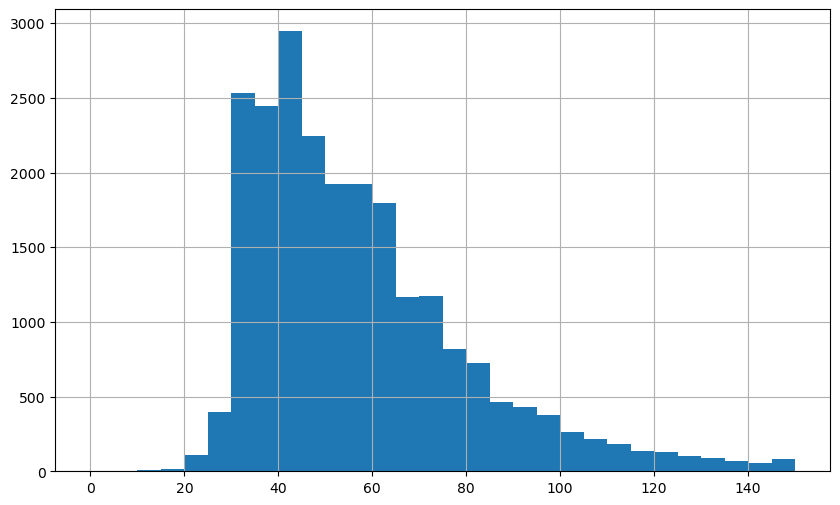

In [28]:
data['total_area'].hist(bins= 30, figsize=(10, 6), range=(0, 150));

Большенство значений приходится на значения от 30 до 50 квадратных метров. Дальше значения уходят на уменьшение количества довольно равномерно до 150 квадратных метров. Но максимальное значение выходит 900 кв.м., думаю, что значения выше 150кв.м. можно считать выбросами.

#####  Жилая площадь:

In [29]:
data['living_area'].describe()

count    23215.000000
mean        33.256658
std         17.081220
min          2.000000
25%         19.100000
50%         30.000000
75%         41.000000
max        149.400000
Name: living_area, dtype: float64

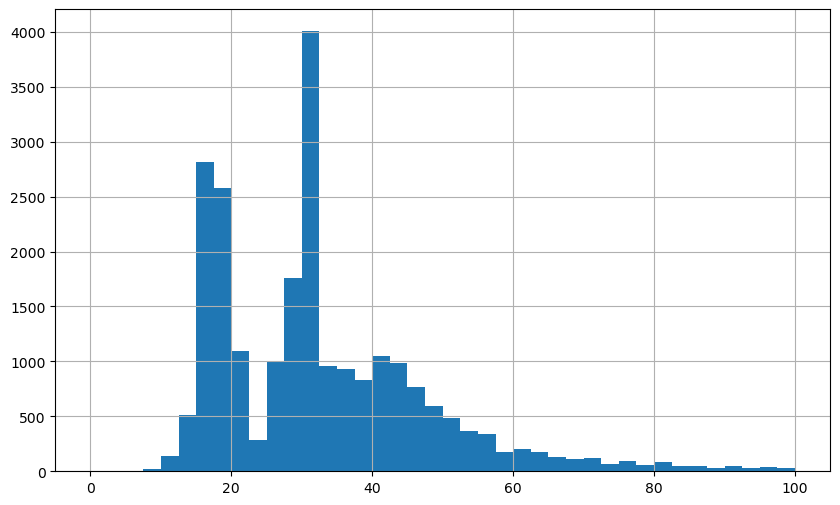

In [30]:
data['living_area'].hist(bins= 40, figsize=(10, 6), range=(0, 100), grid=True);

На гистограмме можно видеть спад значений в диапазоне от 20 до 30 кв.м.. Это может быть обусловлено ошибкой в данных.

#### Площадь кухни:

In [31]:
data['kitchen_area'].describe()

count    23215.000000
mean        10.287102
std          5.146797
min          1.300000
25%          7.200000
50%          9.100000
75%         11.400000
max         93.000000
Name: kitchen_area, dtype: float64

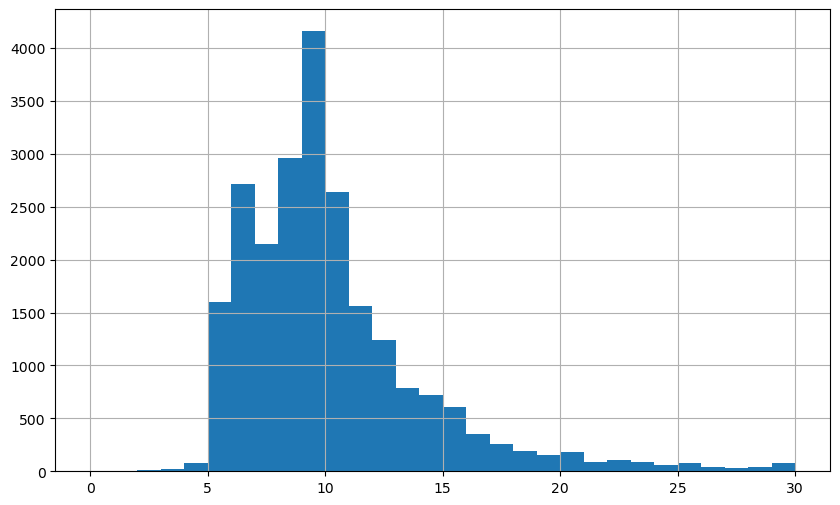

In [32]:
data['kitchen_area'].hist(bins= 30, figsize=(10, 6), range=(0, 30), grid=True);

Основной объем данных лежит в диапазоне от 7 до 11 кв.м.. Значений больше 20 кв.м. уже очень мало, 30 кв.м. практически нет.

#### Цена объекта:

In [33]:
data['last_price'].describe()

count    2.321500e+04
mean     6.037977e+06
std      5.361449e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.700000e+06
max      7.933900e+07
Name: last_price, dtype: float64

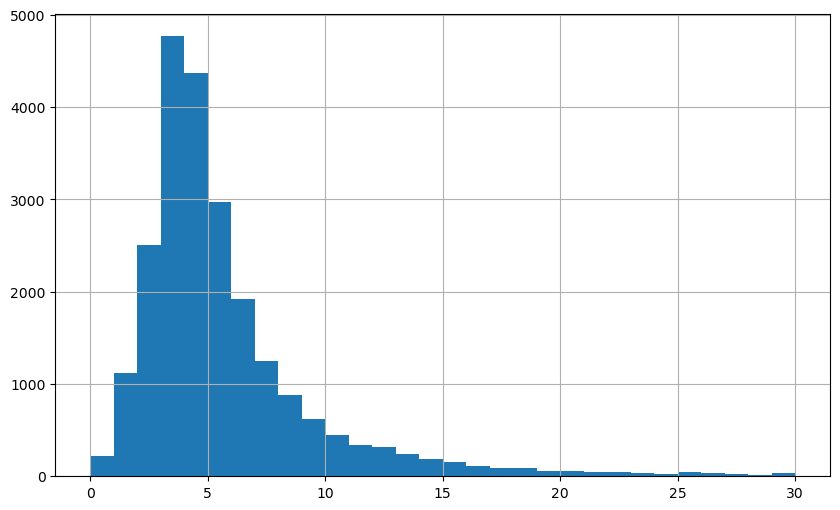

In [34]:
last = data.copy()
last['last_price'] = last['last_price']/1000000
last['last_price'].hist(bins= 30, figsize=(10, 6), range=(0, 30), grid=True);

В цене жилья нормальное распределение. Больше всего квартир с ценой от 2,5 до 5 млн. Квартиры от 20млн и выше уже встречаются гораздо реже. Выбросами можно считать квартиры от 30 млн.

#### Количество комнат:

In [35]:
data['rooms'].describe()

count    23215.000000
mean         2.058755
std          0.993861
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

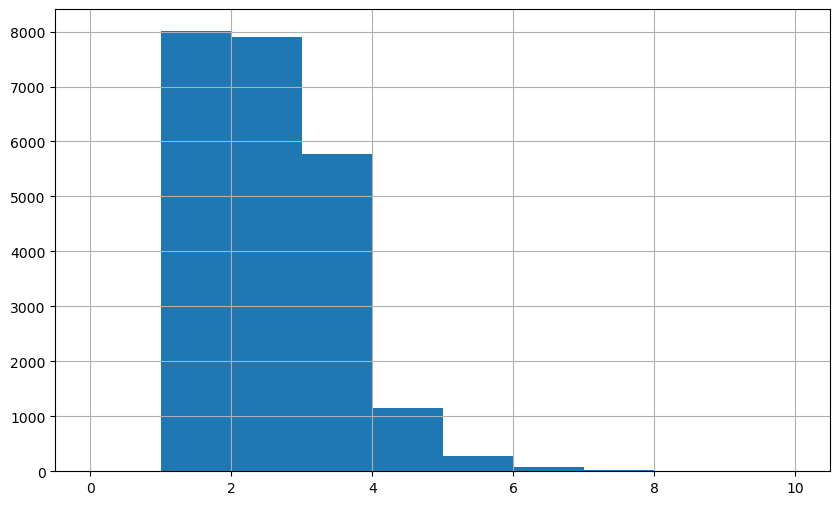

In [36]:
data['rooms'].hist(bins= 10, figsize=(10, 6), range=(0, 10), grid=True);

Больше всего данных с количеством комнат от одной до четырех. Больше шести это выбивающиеся значения и можно считать выбросами.

#### Высота потолков:

In [37]:
data['ceiling_height'].describe()

count    23215.000000
mean         2.694543
std          0.226830
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

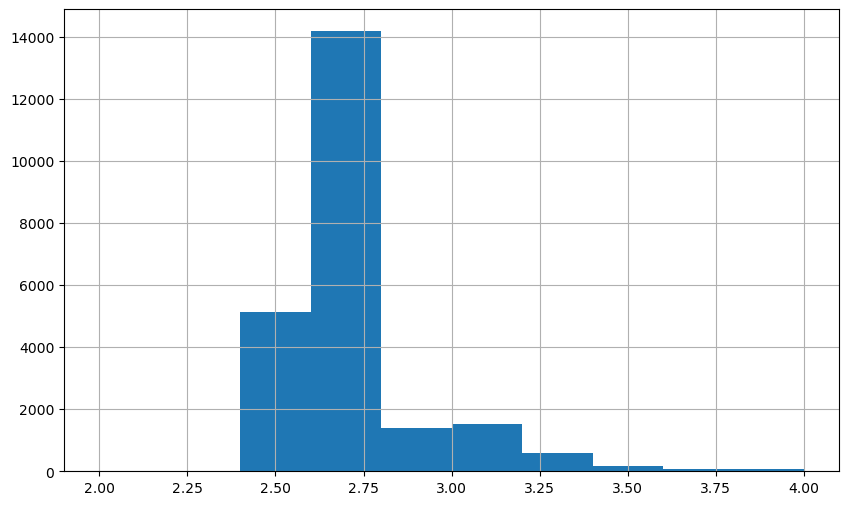

In [38]:
data['ceiling_height'].hist(bins= 10, figsize=(10, 6), range=(2, 4), grid=True);

Большинство значений с высотой потолков находится с диапазоне от 2,5 до 2,8 метров. Есть значения больше 4 метра и больше но их минимальное количество.

#### Тип этажа квартиры:

In [39]:
data['floor_type'].describe()

count      23215
unique         3
top       другой
freq       17077
Name: floor_type, dtype: object

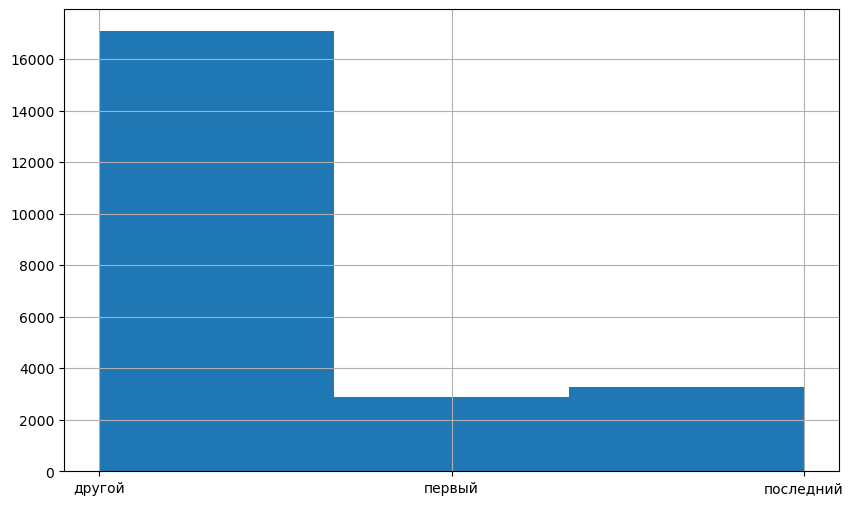

In [40]:
data['floor_type'].hist(bins= 3, figsize=(10, 6), grid=True);

Больше всего значений с этажем типа "другой" на этот тип приходится почти 17500 значений, тогда как тип "последний" и "первый" около 6000 значений.

#### Общее количество этажей в доме:

In [41]:
data['floors_total'].describe()

count    23215.000000
mean        10.649278
std          6.562030
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

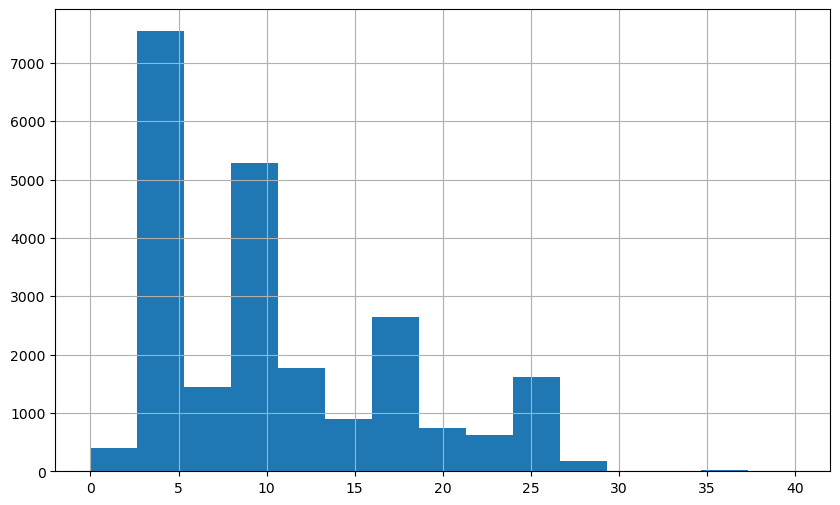

In [42]:
data['floors_total'].hist(bins= 15, figsize=(10, 6), range=(0, 40), grid=True);

Пики на гистограмме это 4-5, 9-10 этажей, остальных этажей значительно меньше. после 27 этажей значения единичны.

#### Расстояние до центра города в метрах:

In [43]:
data['city_centers_nearest_km'].describe()

count    17794.000000
mean        14.261436
std          8.625194
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest_km, dtype: float64

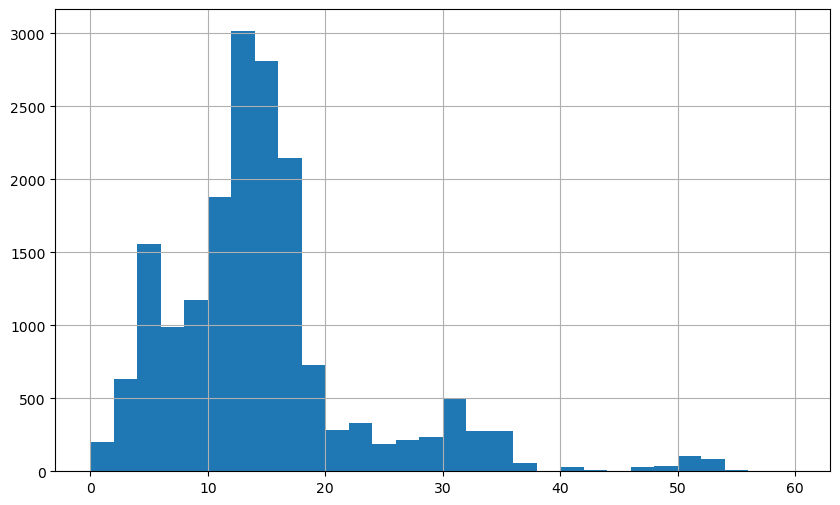

In [44]:
data['city_centers_nearest_km'].hist(bins= 30, figsize=(10, 6), range=(0, 60), grid=True);

По гистограмме видно, что основное количество данных находятся в диапазоне от 5 до 20 км, после 20 км наблюдается спад количества объектов. А после 35км и вовсе уже остается не так много квартир. Скорее всего то связано с тем, что большая часть данных приходтся на Санкт-Петербург. А остальное приходтся на населенные пункты области. 

#### Расстояние до ближайшего аэропорта:

In [45]:
data['airports_nearest'].describe()

count    17774.00000
mean     28840.28041
std      12661.82565
min          0.00000
25%      18539.00000
50%      26813.50000
75%      37347.00000
max      84869.00000
Name: airports_nearest, dtype: float64

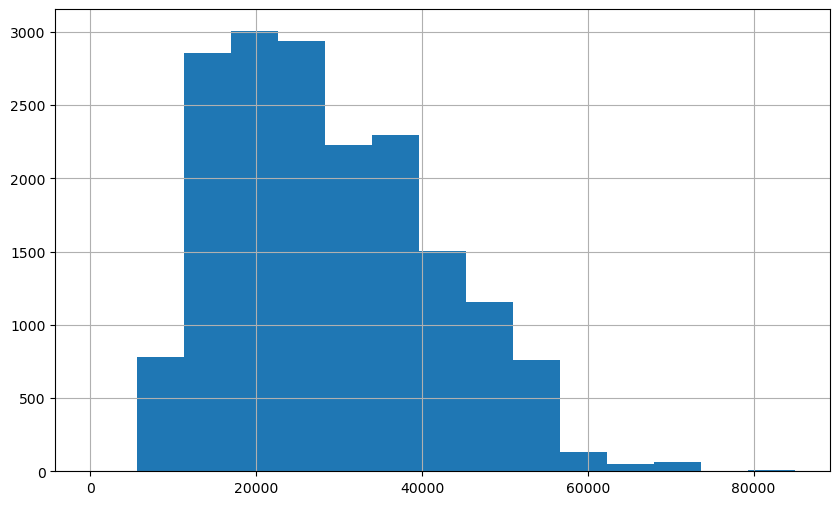

In [46]:
data['airports_nearest'].hist(bins= 15, figsize=(10, 6), range=(0, 85000), grid=True);

Основное количество данных лежит в диапазоне от 10000м и до 40000м до ближайшего аэропорта. Резкий спад наблюдается ближе к 60000м. 

#### Расстояние до ближайшего парка:

In [47]:
data['parks_nearest'].describe()

count    7886.000000
mean      491.266802
std       342.058031
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

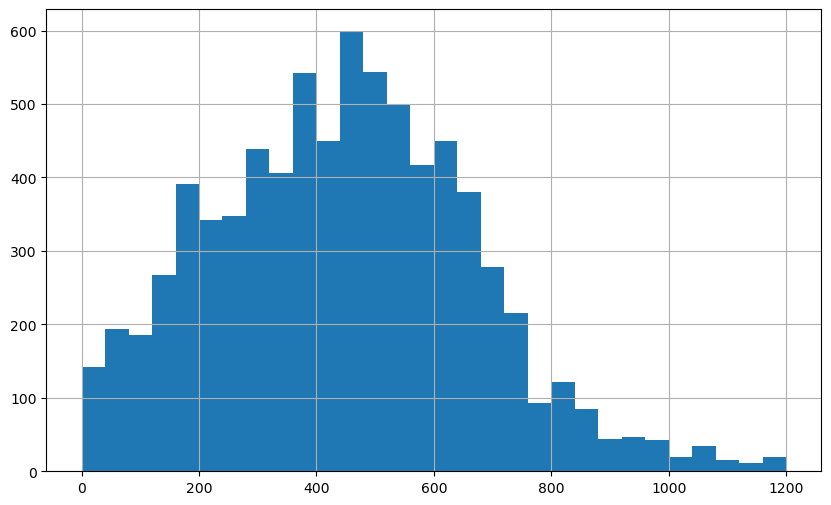

In [48]:
data['parks_nearest'].hist(bins= 30, figsize=(10, 6), range=(0, 1200), grid=True);

Расстояние от 300 до 700 метров самые частые в данной диаграмме. После 1000 метров уже практически не осталось значений их единицы.

#### День публикации объявления:

In [49]:
data['day_week_pub'].describe()

count    23215.000000
mean         2.565583
std          1.790119
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_week_pub, dtype: float64

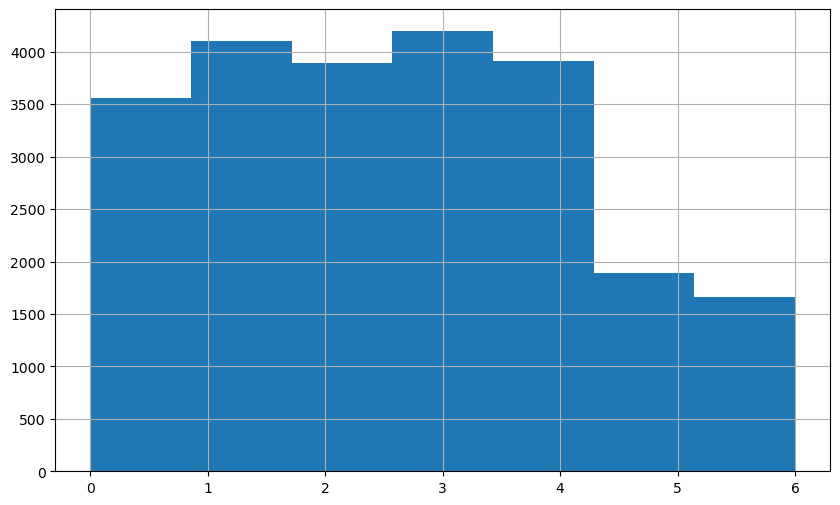

In [50]:
data['day_week_pub'].hist(bins= 7, figsize=(10, 6), range=(0, 6), grid=True);

Большинство объявлений по продаже квартир выставлялись в будние дни, меньше всего призодятся на выходные дни. Из будних дней меньше всего приходится на понедельник. 

#### Месяц публикации объявления:

In [51]:
data['month_of_pub'].describe()

count    23215.000000
mean         6.393754
std          3.492387
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_of_pub, dtype: float64

In [ ]:
data['month_of_pub'].hist(bins= 10, figsize=(10, 6), range=(0, 11), grid=True);

Больше всего объявлений выставляется в декабре. Очень большой отрыв по количеству публикаций именно в этот месяц. После идет февраль, март, апрель. 

Вывод: Как мы увидели из предыдущих гистограмм, большенство значений имеют нормальное распределение, что для нас является хорошим знаком. Единственное, насторожила гистограмма в столбце с жилой площадью, там есть явные отклонения от нормального распределения, что наводит на мысль - в данных могут содержаться ошибчные данные.

**Как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление, изучим данные:**

In [ ]:
data['days_exposition'].describe()

In [ ]:
data['days_exposition'].hist(bins= 30, figsize=(10, 6), range=(0, 1580));

In [ ]:
data.boxplot(column= ['days_exposition']);

По этим данным можно определить, что много данных, которые выходят за максимум наблюдаемой выборки. Построим гистограмму по данным, которые не превышают максимум. Возможно это квартиры с завышенной ценой и большой площадью, поэтому они могут продаваться очень долго. Некоторые объявления висят больше года.

In [ ]:
#судя по boxplot квартиры, которые продаются больше, чем 500 дней - это максимальное наблюдаемое значение выборки, значение больше является выбросами, поэтому будем брать значение дней до 500.
count_days_exposition = data.query('days_exposition < 500')
count_days_exposition['days_exposition'].hist(range=(0,500), bins=20)
count_days_exposition['days_exposition'].describe()

In [ ]:
count_days_exposition['days_exposition'].hist(range=(0,100), bins=10);

Из полученных данных можно определить, что основные данные дней по продаже лежат до 100 дней, большая из них до 50 дней, что является средним для Санкт-Петербурга(62 дня, если верить гуглу).

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

**Посмотрим, зависит ли цена от общей площади жилья:**

In [ ]:
price_square = data.pivot_table(index='last_price', values='total_area')
price_square = price_square.reset_index()
display(price_square)
price_square.plot(x='total_area', y='last_price', kind='scatter', figsize=(10, 5), grid=True, title='График зависимости цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена недвижимости')
display(data['last_price'].corr(data['total_area']))

Есть  зависимость цены от общей площади, можно видеть по графику, как с увеличением площади растет и цена.

**Посмотрим, зависит ли цена от жилой площади:**

In [ ]:
price_square = data.pivot_table(index='last_price', values='living_area')
price_square = price_square.reset_index()
display(price_square)
price_square.plot(x='living_area', y='last_price', kind='scatter', figsize=(10, 5), grid=True, title='График зависимости цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена недвижимости')
display(data['last_price'].corr(data['living_area']))

Есть зависимость цены от жилой площади, можно видеть по графику, как с увеличением площади растет и цена.

**Посмотрим, зависит ли цена от площади кухни:**

In [ ]:
price_square = data.pivot_table(index='last_price', values='kitchen_area')
price_square = price_square.reset_index()
display(price_square)
price_square.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(10, 5), grid=True, title='График зависимости цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена недвижимости')
display(data['last_price'].corr(data['kitchen_area']))

Есть зависимость между ценой квартиры и площадью кухни. Но при этом видно, что кухни, например в 10 кв.м. могут существенно различаться в цене.

**Посмотрим, зависит ли цена от количества комнат:**

In [ ]:
price_square = data.pivot_table(index='last_price', values='rooms')
price_square = price_square.reset_index()
display(price_square)
price_square.plot(x='rooms', y='last_price', kind='scatter', figsize=(10, 5), grid=True, title='График зависимости цены от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('Цена недвижимости')
display(data['last_price'].corr(data['rooms']))

Цены зависят от количества комнат, видно увеличение при росте комнат.

**Посмотрим, зависит ли цена от типа этажа:**

In [ ]:
price_square = data.pivot_table(index='floor', values='last_price')
price_square = price_square.reset_index()
display(price_square.head(10))

display(data['last_price'].corr(data['floor']))

In [ ]:
price_square.plot(x='floor', y='last_price', kind='bar', figsize=(10, 5), grid=True, title='График зависимости цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена недвижимости');

По графику видно, что первый этаж стоит дешевле. Цена со второго до 25 этажа примерно в одном диапазоне. А вот цена за этажи от 29 до 33 значительно выше, чем за остальные, возможно дело в том, что эти высотки относятся к элитной недвижимости, потому и видно скачок в цене.

**Посмотрим, зависит ли цена от дня недели:**

In [ ]:
price_square = data.pivot_table(index='day_week_pub', values='last_price')
price_square = price_square.reset_index()
display(price_square)

display(data['last_price'].corr(data['day_week_pub']))

In [ ]:
price_square.plot(x='day_week_pub', y='last_price', kind='bar', figsize=(10, 5), grid=True, title='График зависимости цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена недвижимости');

Зависимости никакой нет.

**Посмотрим, зависит ли цена от месяца публикации:**

In [ ]:
price_square = data.pivot_table(index='month_of_pub', values='last_price')
price_square = price_square.reset_index()
display(price_square)

display(data['last_price'].corr(data['month_of_pub']))

In [ ]:
price_square.plot(x='month_of_pub', y='last_price', kind='bar', figsize=(10, 5), grid=True, title='График зависимости цены от месяца публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена недвижимости');

Зависимости нет.

**Посмотрим, зависит ли цена от года публикации:**

In [ ]:
price_square = data.pivot_table(index='year_of_pub', values='last_price')
price_square = price_square.reset_index()
display(price_square)

display(data['last_price'].corr(data['year_of_pub']))

In [ ]:
price_square.plot(x='year_of_pub', y='last_price', kind='bar', figsize=(10, 5), grid=True, title='График зависимости цены от года публикации')
plt.xlabel('Год публикации')
plt.ylabel('Цена недвижимости');

Цена в объявлениях за 2014 год значительно выше, чем в остальные года.

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`.**

In [ ]:
top_name = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count','mean'])

top_name.columns =['Количество объявлений', 'Средняя цена за кв.м.']
top_name = top_name.sort_values(by='Количество объявлений', ascending=False)
top_name= top_name.reset_index()
top_name = top_name.loc[0:9]
top_name_max = top_name['Средняя цена за кв.м.'].max().round()
top_name_min = top_name['Средняя цена за кв.м.'].min().round()
print("Населенный пункт с самой высокой стоимостью квадратного метра: Санкт-Петербург, средняя цена за кв.м. - ", top_name_max)
print("Населенный пункт с самой низкой стоимостью квадратного метра: Выборг, средняя цена за кв.м. - ", top_name_min)
display(top_name)

Населенным пунктом с самой высокой ценой за квадратный метр среди других населенных пунктов является Санкт-Петербург. В то время как, самая дешевая цена за квадратный метр в нашей десятке у Выборга.

**Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

In [ ]:
dist_price=data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest_km', values='last_price').reset_index()
dist_price['avg_price_km']=dist_price['last_price']/dist_price['city_centers_nearest_km']

dist_price.plot(x='city_centers_nearest_km', y='last_price', figsize=(10, 5), grid=True, linewidth= 4, title='График зависимости расстояния до центра города и цены')
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена недвижимости')

display(dist_price)



Цена напрямую зависит от расстояния до центра города. Чем ближе квартира находится к центру города, тем дороже. Например, квартира которая находится в 10 километрах от центра, стоит меньше в 3 раза, чем та, что в одном километре от центра. По графику видно, чем ближе к центру города находится квартира, тем более выражен скачок цены. После 10км зависимость становится все менее выражена.

### Общий вывод:

* В данном проекте выполнили изучили исходные данные, определили какие дальнейшие действия можно произвести с ними, чтобы в последующем можно было выполнять вычисления. Заменили пропущенные значения, переименовали столбцы, заполнили пропуски(там, где это было возможно сделать), выявили явные и неявные дубликаты, удалили аномальные значения, изменили тип данных. 
* После чего, изучили и описали данные по таким параметрам как: жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления. Построены гистограммы по каждому параметру и описаны наблюдения.
* Изучили, как быстро продавались квартиры в Санкт-Петербурге и области, выявили, что большинство квартир продаются довольно быстро, в среднем около 1,5 месяцев, но есть долгие продажи которые висят больше года. Все продажи, что меньше 1,5 месяца являются быстрыми. Вполне вероятно, что по ним было очень хорошее предложение цены, метража и общего состояния квартиры в отличии от остальных представленных объявлений.
* Выполнил задание, какие факторы больше всего влияют на общую (полную) стоимость объекта, для этого по параметрам: общая площадь, жилая площадь, площадь кухни, количество комнат, тип этажа, даты размещения (день недели, месяц, год), выявили зависимости от цены квартиры и описали каждый график, посчитали коэффициент корреляции.
* Было выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений." Для этого нашли населенные пункты с самыми большим количеством объявлений, и выделили 10 с наибольшим количеством объявлений и по ним нашли среднюю цену за квадратный метр, после чего нашли минимальное и максимальное значение цены за квадратный метр.
* Следующим задание выполнил, где нужно было выделить объявления по продаже квартир в Санкт-Петербурге и посчитать, как зависит цена от удаления на каждый километр от центра города. Сделали срез данных, построили сводную таблицу и выполнили расчет, почсле чего построили график зависимости и получили результат. Чем дальше от центра города находится квартира, тем дешевле она будет стоить.
    